In [1]:
#-*- coding: utf-8 -*-

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)




1 Physical GPUs, 1 Logical GPUs


In [2]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()



In [3]:
## TEST할 이미지 선택
test_image = X_test[0]  ## image에 matrix 곱




In [4]:
## NN 이미로 이차원으로 데이터를 넣어주어야 해서 1x784 형태로 reshape하고 노말라이제이션
test_image_reshape = test_image.reshape(1,784).astype('float64')  ## 이미지가 2-d이므로 1-d로 변환하여 nn으로 전달
### (28x28)이미지 를 784 개로 reshape 앞에 1이라는 숫자는 데이터 1개다. batch size의미.



In [5]:
## 모델 불러오기
model = tf.keras.models.load_model('./MNIST_model/07-0.0792.hdf5') # 모델을 새로 불러옴



In [8]:
# 불러온 모델로 값 예측하기.
Y_prediction = model.predict(test_image_reshape)
## Y_prediction = [[ 0.1 0.1 .... 0.7 0.1 ]] 1개의 이미지의 결과를  10개의 값 으로 예측
# 10개는 각 perceptron의 예측 값.



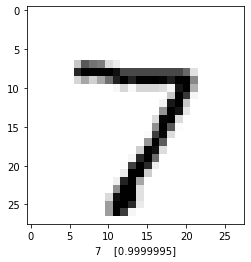

In [9]:
## 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은값을 출력하는 인덱스를 추출. 그럼 이것이 결국 class임.
### np.argmax는 들어온 행렬에서 가장 높은값이 있는 index를 반환해주는 함수.
index=np.argmax(Y_prediction)
vlaue=Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel(str(index)+"    " +str(vlaue))
plt.show()

In [65]:
## 이미지 회전 변환 메트릭스 구하기
M= cv2.getRotationMatrix2D((28/2, 28/2), 0, 1)  ## Matrix 생성
## 이미지 이동 변환 메트릭스 구하기
M[0, 2]=M[0, 2]+5
M[1, 2]=M[1, 2]+5
#test_image = X_test[0]
## 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_test[0], M, (28, 28))  ## image에 matrix 곱

In [66]:
## NN 이미로 이차원으로 데이터를 넣어주어야 해서 1x784 형태로 reshape하고 노말라이제이션
test_image_reshape = test_image.reshape(1,784).astype('float64')  ## 이미지가 2-d이므로 1-d로 변환하여 nn으로 전달

In [67]:
print(test_image_reshape)
# 불러온 모델로 값 예측하기.
Y_prediction = model.predict(test_image_reshape)
print(Y_prediction)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   

(1, 10)


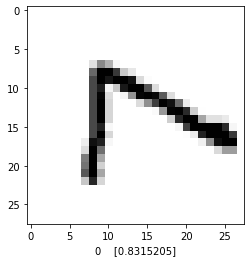

In [68]:
## 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은값을 출력하는 인덱스를 추출. 그럼 이것이 결국 class임.
### np.argmax는 들어온 행렬에서 가장 높은값이 있는 index를 반환해주는 함수.
index=np.argmax(Y_prediction)
vlaue=Y_prediction[:, index]
print(Y_prediction.shape)
plt.imshow(test_image, cmap='Greys')
plt.xlabel(str(index)+"    " +str(vlaue))
plt.show()